# Lab 3 - Neural Networks


#### Dependencies:

In [1]:
import tensorflow as tf
from visualize_activations import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

#### 
## 1.1 Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape, "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


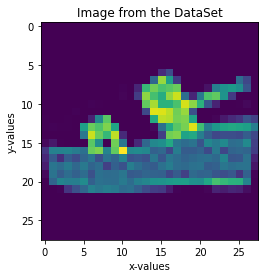

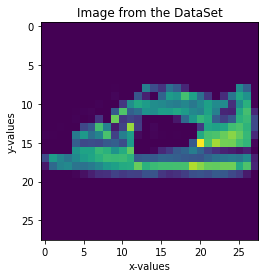

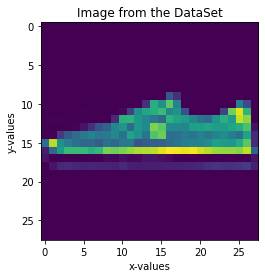

In [3]:
for i in range(12, 15):
    plt.imshow(x_train[i])
    plt.title('Image from the DataSet')
    plt.xlabel('x-values')
    plt.ylabel('y-values')
    plt.show()

In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
y_train=tf.keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")

In [6]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
x_train=np.expand_dims(x_train,axis=3);
x_test=np.expand_dims(x_test,axis=3);
x_validation=np.expand_dims(x_validation,axis=3)
print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape,"x_validation shape:", x_validation.shape)

x_train shape: (48000, 28, 28, 1) x_test shape: (10000, 28, 28, 1) x_validation shape: (12000, 28, 28, 1)


#### 
## 1.2 MLP

In [36]:
model = tf.keras.Sequential(name="MLP_Early")
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
print("model shape:", model.output_shape)

model shape: (None, 784)


In [37]:
model.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model shape:", model.output_shape)
model.add(tf.keras.layers.Dense(64, activation="relu", name="Dense_64"))
print("model shape:", model.output_shape)

model shape: (None, 32)
model shape: (None, 64)


In [38]:
model.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10"))
print("model shape:", model.output_shape)

model shape: (None, 10)


In [39]:
model.summary()

Model: "MLP_Early"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
Dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
Softmax_10 (Dense)           (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [40]:
callback=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [41]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model.compile(optimizer=opt, loss="categorical_crossentropy")
history=model.fit(x=x_train,y=y_train,epochs=200,batch_size=200,callbacks=[callback],validation_data=(x_validation,y_validation))

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.7369 - val_loss: 0.5001
Epoch 2/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 0.4407
Epoch 3/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4187 - val_loss: 0.4359
Epoch 4/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3937 - val_loss: 0.3983
Epoch 5/200
240/240 [==============================] - 0s 988us/step - loss: 0.3747 - val_loss: 0.3796
Epoch 6/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3606 - val_loss: 0.3869
Epoch 7/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3494 - val_loss: 0.3642
Epoch 8/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3366 - val_loss: 0.3659
Epoch 9/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3326 - val_loss: 0.3554
Epoch 10/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3228 - val_

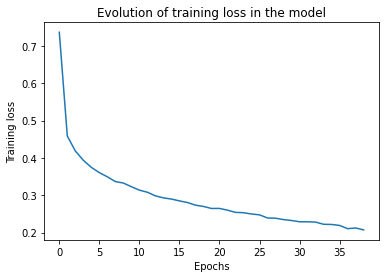

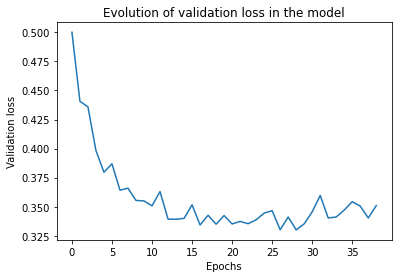

In [42]:
plt.plot(history.history['loss'])
plt.title('Evolution of training loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.savefig("mlp_train_loss.png")
plt.show()
plt.plot(history.history['val_loss'])
plt.title('Evolution of validation loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.savefig("mlp_val_loss.png")
plt.show()

In [15]:
y_prediction=model.predict(x=x_test,batch_size=200,callbacks=[callback])
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.8735 
 Confusion Matrix: [[840   3  22  22   2   0 107   0   4   0]
 [  1 967   0  23   4   0   3   0   2   0]
 [ 17   1 754   8 136   0  83   0   1   0]
 [ 39  11  20 851  43   0  33   0   3   0]
 [  0   2  71  21 835   0  69   0   2   0]
 [  2   0   0   0   0 948   0  24   1  25]
 [138   0  79  26  72   0 681   0   4   0]
 [  0   0   0   0   0  21   0 944   1  34]
 [  8   0  13   6   5   2  10   4 952   0]
 [  0   0   0   0   0   5   2  30   0 963]]


#### 
### Doing the same thing without early stopping

In [16]:
model2 = tf.keras.Sequential(name="MLP_NoEarly")
model2.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 784)


In [17]:
model2.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model2 shape:", model2.output_shape)
model2.add(tf.keras.layers.Dense(64, activation="relu", name="Dense_64"))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 32)
model2 shape: (None, 64)


In [18]:
model2.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10"))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 10)


In [19]:
model2.summary()

Model: "MLP_NoEarly"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
Dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
Softmax_10 (Dense)           (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [20]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model2.compile(optimizer=opt, loss="categorical_crossentropy")
history=model2.fit(x=x_train,y=y_train,epochs=200,batch_size=200,validation_data=(x_validation,y_validation))

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.7621 - val_loss: 0.4871
Epoch 2/200
240/240 [==============================] - 0s 998us/step - loss: 0.4537 - val_loss: 0.4332
Epoch 3/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4085 - val_loss: 0.4468
Epoch 4/200
240/240 [==============================] - 0s 983us/step - loss: 0.3896 - val_loss: 0.3941
Epoch 5/200
240/240 [==============================] - 0s 988us/step - loss: 0.3702 - val_loss: 0.3860
Epoch 6/200
240/240 [==============================] - 0s 995us/step - loss: 0.3585 - val_loss: 0.3790
Epoch 7/200
240/240 [==============================] - 0s 997us/step - loss: 0.3441 - val_loss: 0.3876
Epoch 8/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3347 - val_loss: 0.3593
Epoch 9/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3263 - val_loss: 0.3597
Epoch 10/200
240/240 [==============================] - 0s 991us/step - loss: 0.3

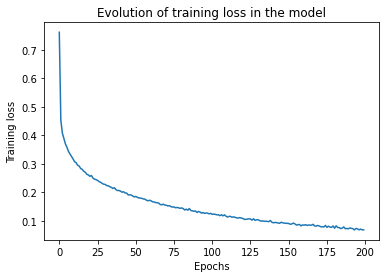

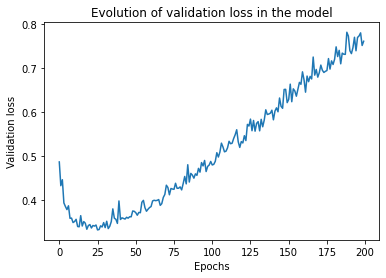

In [22]:
plt.plot(history.history['loss'])
plt.title('Evolution of training loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()
plt.plot(history.history['val_loss'])
plt.title('Evolution of validation loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

In [23]:
y_prediction=model2.predict(x=x_test,batch_size=200)
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.8638 
 Confusion Matrix: [[802   6  14  28   4   2 136   0   8   0]
 [  5 962   2  19   7   0   4   0   1   0]
 [ 26   0 767  14 115   0  69   1   8   0]
 [ 25  16  13 847  43   0  46   1   8   1]
 [  0   1  94  24 820   1  57   0   3   0]
 [  0   0   0   1   0 924   1  38   6  30]
 [118   1  84  21  80   0 689   0   7   0]
 [  0   0   1   0   0  20   0 934   2  43]
 [  5   1  10   6   5   4  17   4 948   0]
 [  0   0   0   0   0  12   1  42   0 945]]


#### 
## 1.3 CNN

In [24]:
model3 = tf.keras.Sequential(name="CNN")
model3.add(tf.keras.layers.Conv2D(16,3,input_shape=(28, 28, 1),activation="relu"))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 26, 26, 16)


In [25]:
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 13, 13, 16)


In [26]:
model3.add(tf.keras.layers.Conv2D(16,3,input_shape=(28, 28, 1),activation="relu"))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 11, 11, 16)


In [27]:
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 5, 5, 16)


In [28]:
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model3 shape:", model3.output_shape)

model3 shape: (None, 32)


In [29]:
model3.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10_2"))
print("model3 shape:", model3.output_shape)

model3 shape: (None, 10)


In [30]:
model3.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                12832     
_________________________________________________________________
Softmax_10_2 (Dense)         (None, 10)                330     

In [31]:
model3.compile(optimizer=opt, loss="categorical_crossentropy")
history=model3.fit(x=x_train,y=y_train,epochs=200,batch_size=200,callbacks=[callback],validation_data=(x_validation,y_validation))

Epoch 1/200
240/240 [==============================] - 5s 21ms/step - loss: 0.5953 - val_loss: 0.4400
Epoch 2/200
240/240 [==============================] - 5s 21ms/step - loss: 0.4156 - val_loss: 0.3977
Epoch 3/200
240/240 [==============================] - 5s 21ms/step - loss: 0.3745 - val_loss: 0.3666
Epoch 4/200
240/240 [==============================] - 5s 21ms/step - loss: 0.3506 - val_loss: 0.3470
Epoch 5/200
240/240 [==============================] - 5s 21ms/step - loss: 0.3326 - val_loss: 0.3373
Epoch 6/200
240/240 [==============================] - 5s 22ms/step - loss: 0.3154 - val_loss: 0.3305
Epoch 7/200
240/240 [==============================] - 5s 22ms/step - loss: 0.3062 - val_loss: 0.3183
Epoch 8/200
240/240 [==============================] - 5s 22ms/step - loss: 0.2979 - val_loss: 0.3168
Epoch 9/200
240/240 [==============================] - 5s 21ms/step - loss: 0.2897 - val_loss: 0.3129
Epoch 10/200
240/240 [==============================] - 5s 21ms/step - loss: 0.282

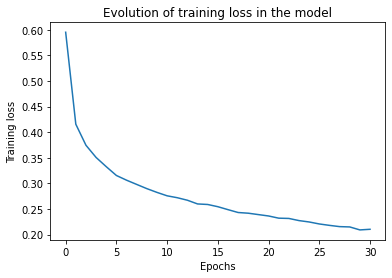

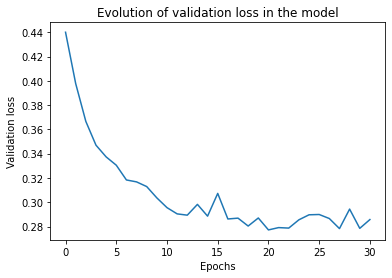

In [33]:
plt.plot(history.history['loss'])
plt.title('Evolution of training loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.savefig("cnn_train_loss.png")
plt.show()
plt.plot(history.history['val_loss'])
plt.title('Evolution of validation loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.savefig("cnn_val_loss.png")
plt.show()

In [34]:
y_prediction=model3.predict(x=x_test,batch_size=200)
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.8942 
 Confusion Matrix: [[838   1  18  28   4   1  99   0  11   0]
 [  2 972   0  18   4   0   3   0   1   0]
 [ 14   0 850  11  56   0  65   0   4   0]
 [ 14   7   8 917  23   0  28   0   3   0]
 [  1   1  77  37 807   0  75   0   2   0]
 [  0   0   0   1   0 979   0  13   1   6]
 [133   1  72  31  58   0 691   0  14   0]
 [  0   0   0   0   0  11   0 968   1  20]
 [  4   0   4   4   3   2   5   4 974   0]
 [  1   0   0   0   0   6   0  47   0 946]]


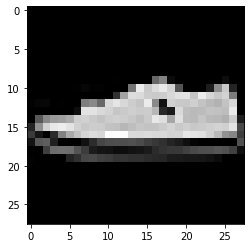

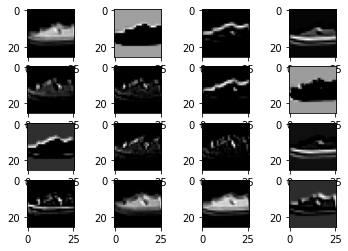

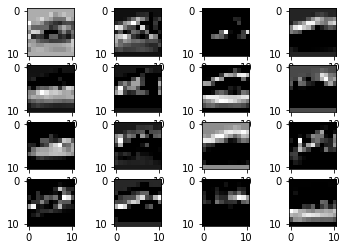

In [35]:
image = x_train[13].copy()
image = image.squeeze()
visualize_activations(model3,[0,2],image)